# Graph 2Derrorsfit
Draw and fit a TGraph2DErrors




**Author:** Olivier Couet  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:46 AM.</small></i>

In [1]:
%%cpp -d
#include <TMath.h>
#include <TGraph2DErrors.h>
#include <TRandom.h>
#include <TStyle.h>
#include <TCanvas.h>
#include <TF2.h>

In [2]:
TCanvas *c1 = new TCanvas("c1");

Double_t rnd, x, y, z, ex, ey, ez;
Double_t e = 0.3;
Int_t nd = 500;

TRandom r;
TF2  *f2 = new TF2("f2","1000*(([0]*sin(x)/x)*([1]*sin(y)/y))+200",-6,6,-6,6);
f2->SetParameters(1,1);
TGraph2DErrors *dte = new TGraph2DErrors(nd);

Fill the 2d graph

In [3]:
Double_t zmax = 0;
for (Int_t i=0; i<nd; i++) {
   f2->GetRandom2(x,y);
   rnd = r.Uniform(-e,e); // Generate a random number in [-e,e]
   z = f2->Eval(x,y)*(1+rnd);
   if (z>zmax) zmax = z;
   dte->SetPoint(i,x,y,z);
   ex = 0.05*r.Rndm();
   ey = 0.05*r.Rndm();
   ez = TMath::Abs(z*rnd);
   dte->SetPointError(i,ex,ey,ez);
}

f2->SetParameters(0.5,1.5);
dte->Fit(f2);
TF2 *fit2 = (TF2*)dte->FindObject("f2");
fit2->SetTitle("Minuit fit result on the Graph2DErrors points");
fit2->SetMaximum(zmax);
gStyle->SetHistTopMargin(0);
fit2->SetLineColor(1);
fit2->SetLineWidth(1);
fit2->Draw("surf1");
dte->Draw("same p0");

 FCN=515.752 FROM MIGRAD    STATUS=CONVERGED      39 CALLS          40 TOTAL
                     EDM=2.17543e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.76229e-01   2.12668e-01   1.94625e-05  -1.18898e-02
   2  p1           1.72869e+00   6.38003e-01   5.83874e-05  -3.96417e-03


Warning in <TF2::GetRandom2>: function:f2 has 24 negative values: abs assumed


Draw all canvases 

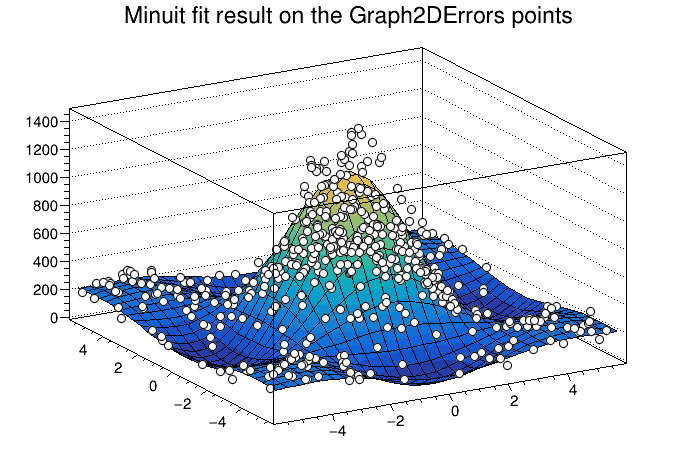

In [4]:
gROOT->GetListOfCanvases()->Draw()